### 실제로 시각화를 통해서 살펴보도록 해요

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

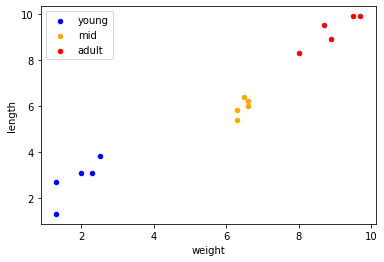

In [ ]:
X = np.array([[6.6, 6.2, 1],
              [9.7, 9.9, 2],
              [8.0, 8.3, 2],
              [6.3, 5.4, 1],
              [1.3, 2.7, 0],
              [2.3, 3.1, 0],
              [6.6, 6.0, 1],
              [6.5, 6.4, 1],
              [6.3, 5.8, 1],
              [9.5, 9.9, 2],
              [8.9, 8.9, 2],
              [8.7, 9.5, 2],
              [2.5, 3.8, 0],
              [2.0, 3.1, 0],
              [1.3, 1.3, 0]])

df = pd.DataFrame(X, columns=['weight', 'length', 'label'])

ax = df[df['label'] == 0].plot.scatter(x='weight', y='length', c='blue', label='young')
ax = df[df['label'] == 1].plot.scatter(x='weight', y='length', c='orange', label='mid', ax=ax)
ax = df[df['label'] == 2].plot.scatter(x='weight', y='length', c='red', label='adult', ax=ax)
ax

색깔이 다른 수 많은 숫자들 중에서 각각 하나씩만 선별해볼게요

찾고 싶은 것은 point를 셋 중 어느 레이블에 설정하는 게 좋을까입니다.

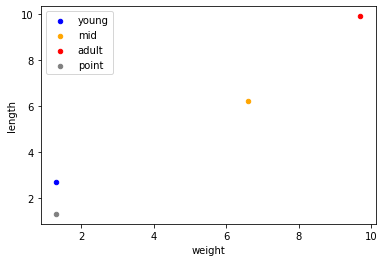

In [ ]:
df2 = pd.DataFrame([df.iloc[0], df.iloc[1], df.iloc[4]], columns=['weight', 'length', 'label'])
df3 = pd.DataFrame([df.iloc[14]], columns=['weight', 'length', 'label'])

ax = df2[df2['label'] == 0].plot.scatter(x='weight', y='length', c='blue', label='young')
ax = df2[df2['label'] == 1].plot.scatter(x='weight', y='length', c='orange', label='mid', ax=ax)
ax = df2[df2['label'] == 2].plot.scatter(x='weight', y='length', c='red', label='adult', ax=ax)
ax = df3.plot.scatter(x='weight', y='length', c='gray', label='point', ax=ax)
ax

### 살펴보기

1. 유클리드의 결과, 맨허튼 거리의 결과, 코사인 유사도의 차이가 있을까?

2. 값의 차이를 볼 때 무엇을 쓰는 게 더 좋을까?


#### 유클리드부터 해보죠 (L2)

In [ ]:
def euclidean_distance(x, y):   
    return np.sqrt(np.sum((x - y) ** 2))

In [ ]:
x0 = X[0][:-1]
x1 = X[1][:-1]
x4 = X[4][:-1]
x14 = X[14][:-1] #point
print(" x0:", x0, "\n x1:", x1, "\n x4:", x4, "\nx14:", x14)

print(" x14 and x0:", euclidean_distance(x14, x0), "\n",
      "x14 and x1:", euclidean_distance(x14, x1), "\n",
      "x14 and x4:", euclidean_distance(x14, x4))

#아래의 결과값은 유클리드를 활용하여 결과값을 나타낸 것입니다..

 x0: [6.6 6.2] 
 x1: [9.7 9.9] 
 x4: [1.3 2.7] 
x14: [1.3 1.3]
 x14 and x0: 7.218032973047436 
 x14 and x1: 12.021647141718974 
 x14 and x4: 1.4000000000000001


가장 거리가 가까운 것은 4번으로 point를 young클래스로 추축할 수 있겠네요
저희가 생각하는 직관과 같네요

실제로 머신러닝에서도 이런 느낌으로 돌아가요

맨허튼 거리입니다.(L1)

In [ ]:
def Manhattan_distance(x, y):   
    return np.sqrt(np.sum(abs(x - y)))

In [ ]:
x0 = X[0][:-1]
x1 = X[1][:-1]
x4 = X[4][:-1]
x14 = X[14][:-1] #point
print(" x0:", x0, "\n x1:", x1, "\n x4:", x4, "\nx14:", x14)

print(" x14 and x0:", Manhattan_distance(x14, x0), "\n",
      "x14 and x1:", Manhattan_distance(x14, x1), "\n",
      "x14 and x4:", Manhattan_distance(x14, x4))

 x0: [6.6 6.2] 
 x1: [9.7 9.9] 
 x4: [1.3 2.7] 
x14: [1.3 1.3]
 x14 and x0: 3.1937438845342623 
 x14 and x1: 4.123105625617661 
 x14 and x4: 1.1832159566199232


### 코사인 유사도

특징: 유클리드가 줄자로 하는 것이라면 코사인 유사도는 벡터 사이의 각도로만 측정하는 것이고 그 각도가 커지만 서로 멀어져서 커지는 것이기에 각도가 적을 수록 가까운 것을 알 수 있습니다.

사용 상황: 벡터의 크기가 중요하지 않고 거리를 측정할 때 사용이 됩니다.
그래서, 지금처리 거리보다는 나중에 NLP를 하신다면 텍스트 데이터 처리할 때 주로 사용이 되고 더 나아가 정보 검색할 때 사용이됩니다.

In [ ]:
def cosine_similarity(x, y):
    return np.dot(x, y) / (np.sqrt(np.dot(x, x)) * np.sqrt(np.dot(y, y)))

print(" x14 and x0:", cosine_similarity(x14, x0), "\n",
      "x14 and x1:", cosine_similarity(x14, x1), "\n",
      "x14 and x4:", cosine_similarity(x14, x4))

 x14 and x0: 0.9995120760870786 
 x14 and x1: 0.9999479424242859 
 x14 and x4: 0.9438583563660174
